# CS7317 Using Machine Learning Tools 2020, Assignment 2: Breast Cancer Classification

Student name: Yuan Zhang\
Student ID: a1786723

Initialise environment, libraries, settings, etc.:

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Load the data set:

In [2]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [5]:
list(cancer.feature_names)

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [6]:
len(cancer.feature_names)

30

In [7]:
columns = np.append(cancer.feature_names, 'target');   
index = pd.RangeIndex(start=0, stop=569, step=1);
data = np.column_stack((cancer.data, cancer.target))
cancer_df = pd.DataFrame(data=data, index=index, columns=columns)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [8]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

As can bee seen above, all features are of type float64 and have 0 null numbers.

In [9]:
list(cancer.target_names)

['malignant', 'benign']

In [10]:
X = cancer_df.drop('target', axis=1)
y = cancer_df.get('target')

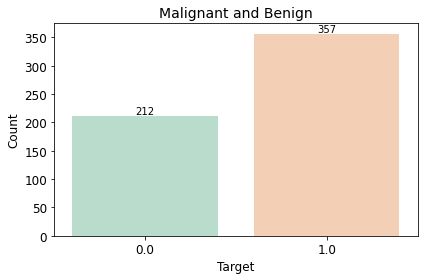

In [11]:
plt.figure()
ax = sns.countplot(y,label="Count", palette="Pastel2")
ax.set_title("Malignant and Benign", fontsize=14)
ax.set_xlabel("Target", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()-10), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points', fontsize=10, color='black')
plt.tight_layout()

From the distribution we above, we can observe a imbalance classes, but it is not so big.

In [12]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### 1	Understand the dataset (15%)

1.1	Question: Briefly describe what each of the 10 parameters of the cell nuclei mean, using the documentation of the dataset and the example image in Figure 1. What could be the reasons for using the mean, standard error and maximum of each of the 10 parameters?

#### Answer:
According to the description of the dataset, there are 569 instances and 30 attributes in total.
The attribute information is as follows:\
Radius (mean of distances from center to points on the perimeter)\
Texture (standard deviation of gray-scale values)\
Perimeter (total distance between the snake points)\
Area (1.5 * the number of pixels on the interior of the snake)\
Smoothness (local variation in radius lengths)\
Compactness (perimeter^2 / area - 1.0)\
Concavity (severity of concave portions of the contour)\
Concave points (number of concave portions of the contour)\
Symmetry (the length diference between lines perpendicular to the major axis to the cell boundary in both directions)\
Fractal dimension ("coastline approximation" - 1)

The mean is the sum of all the values in the data set divided by the number of values in the data set. It gives important information about the data set, and as a single number, can provide a lot of insights into the experiment and nature of the data.

The standard error is the standard deviation of the sampling distribution of that statistic. Standard errors are important because they reflect how much sampling fluctuation a statistic will show. The inferential statistics involved in the construction of confidence intervals and significance testing are based on standard errors.

The maximum(extreme) values are the most intuitively useful for the probelm at hand, since only a few malignant cells may occur in a given example.

1.2	Plot histograms of each of the 30 features, using two distributions, one for each class, in each diagram. Use 3 figures with 10 subplots each.

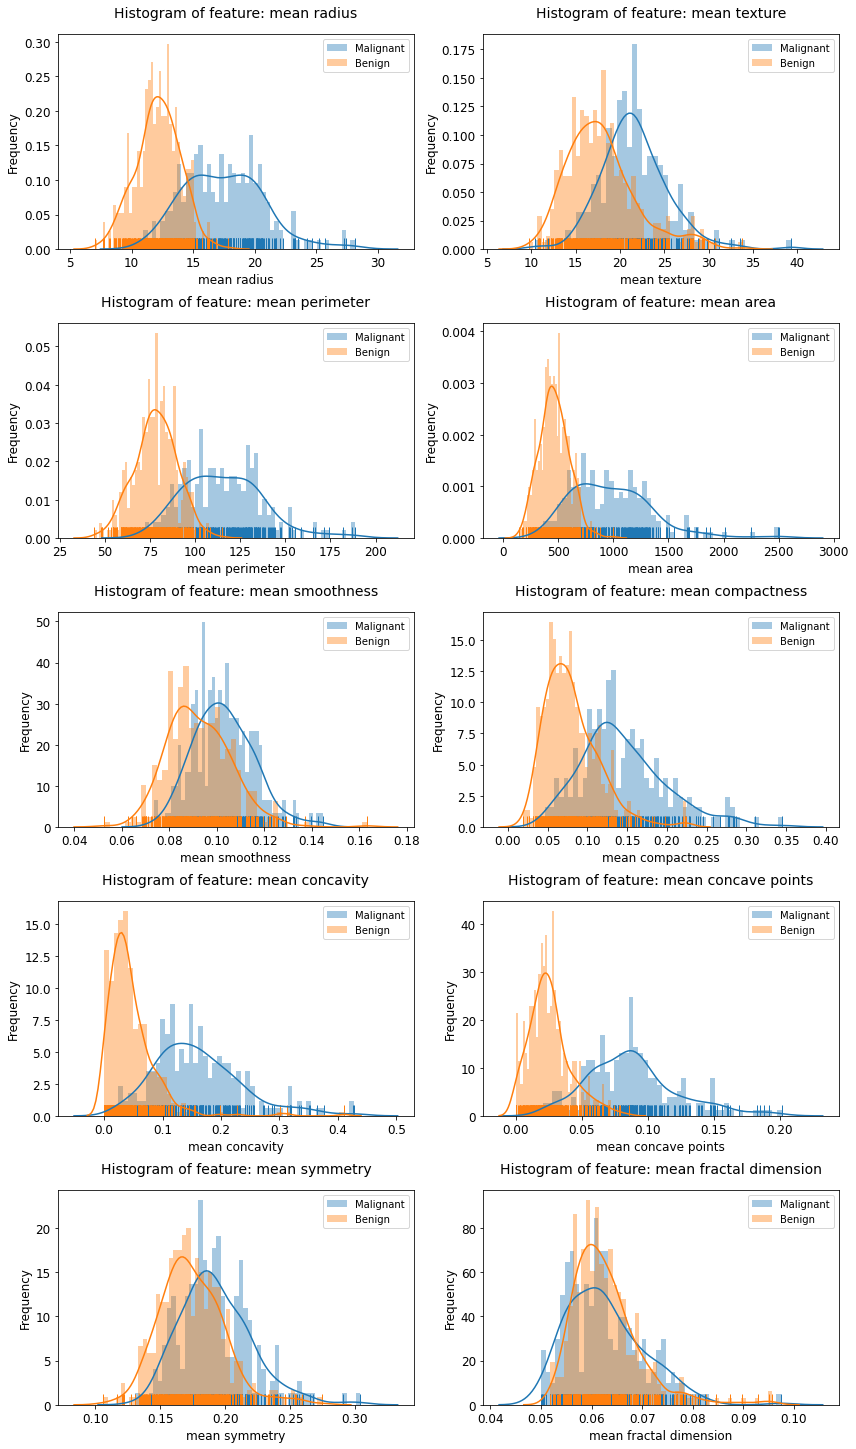

In [13]:
import matplotlib.gridspec as gridspec
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 2)
for i, cn in enumerate(cancer_df.iloc[:,0:10]):
    ax = plt.subplot(gs[i])
    sns.distplot(cancer_df[cn][cancer_df['target'] == 0.0], rug=True, label="Malignant", bins=50)
    sns.distplot(cancer_df[cn][cancer_df['target'] == 1.0], rug=True, label="Benign", bins=50)
    ax.set_title('Histogram of feature: ' + str(cn), fontsize=14, y=1.05)
    ax.set_xlabel(str(cn), fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.legend()
plt.tight_layout()
plt.show()

From the plots above, we can see that the distributions of malignant and benign in 'mean texture', 'mean smoothness', 'mean compactness', 'mean symmetry' and 'mean fractal dimension' are mixed so it is hard to classfy while using these features.

The other five features: mean concave points, mean perimeter, mean concavity, mean area and mean radius, look like more clear in terms of classification.

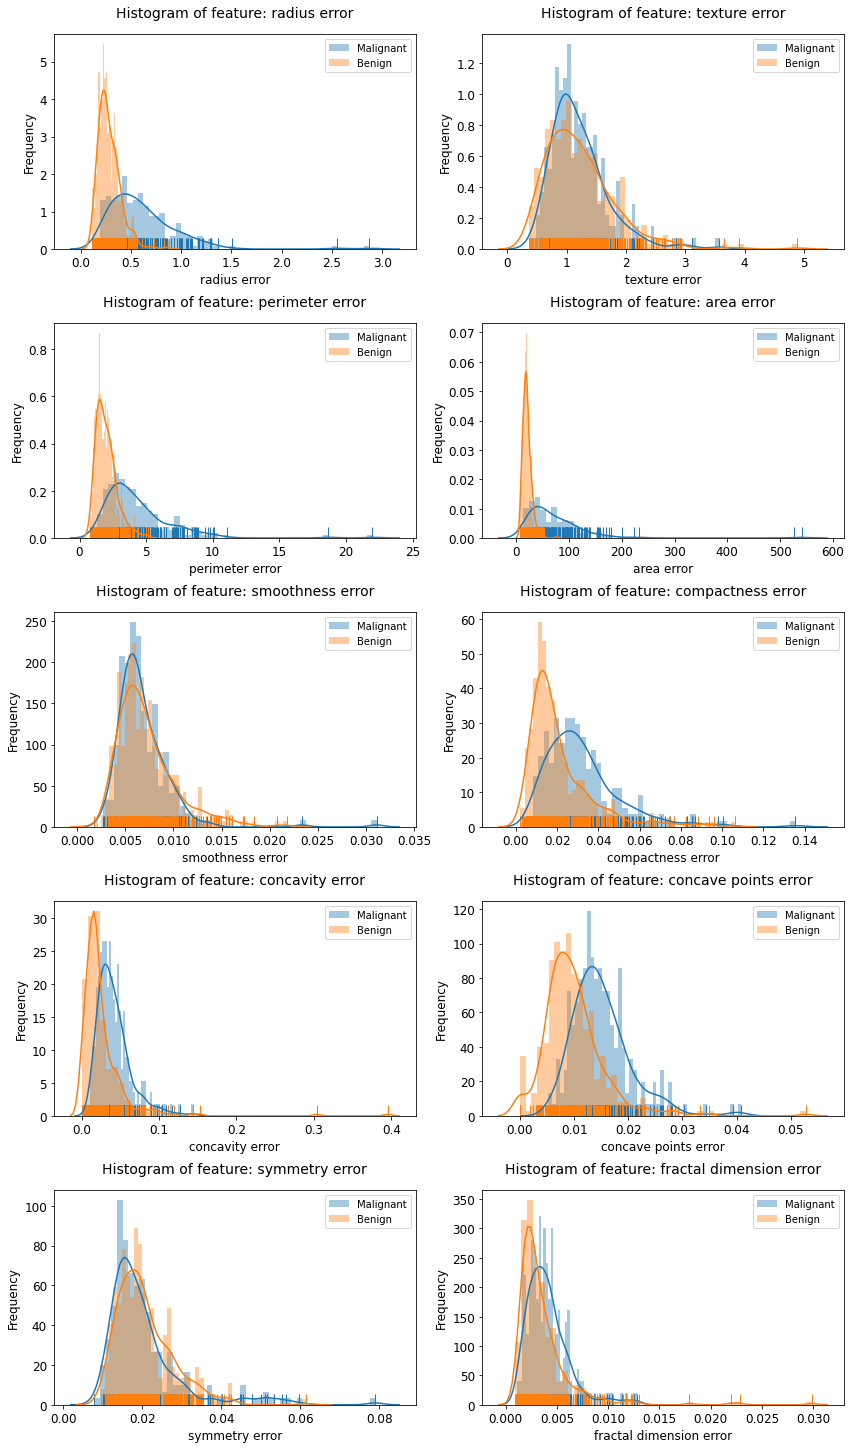

In [14]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 2)
for i, cn in enumerate(cancer_df.iloc[:,10:20]):
    ax = plt.subplot(gs[i])
    sns.distplot(cancer_df[cn][cancer_df['target'] == 0.0], rug=True, label="Malignant", bins=50)
    sns.distplot(cancer_df[cn][cancer_df['target'] == 1.0], rug=True, label="Benign", bins=50)
    ax.set_title('Histogram of feature: ' + str(cn), fontsize=14, y=1.05)
    ax.set_xlabel(str(cn), fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.legend()
plt.tight_layout()
plt.show()

From the plots above, we can see that the distributions of malignant and benign in 'texture error', 'smoothness error', 'compactness error', 'concavity error', 'concave error', 'symmetry error' and 'fractal dimension error' are mixed so it is hard to classfy while using these features.

The other three features: area error, radius error and perimeter error, look like more clear in terms of classification.

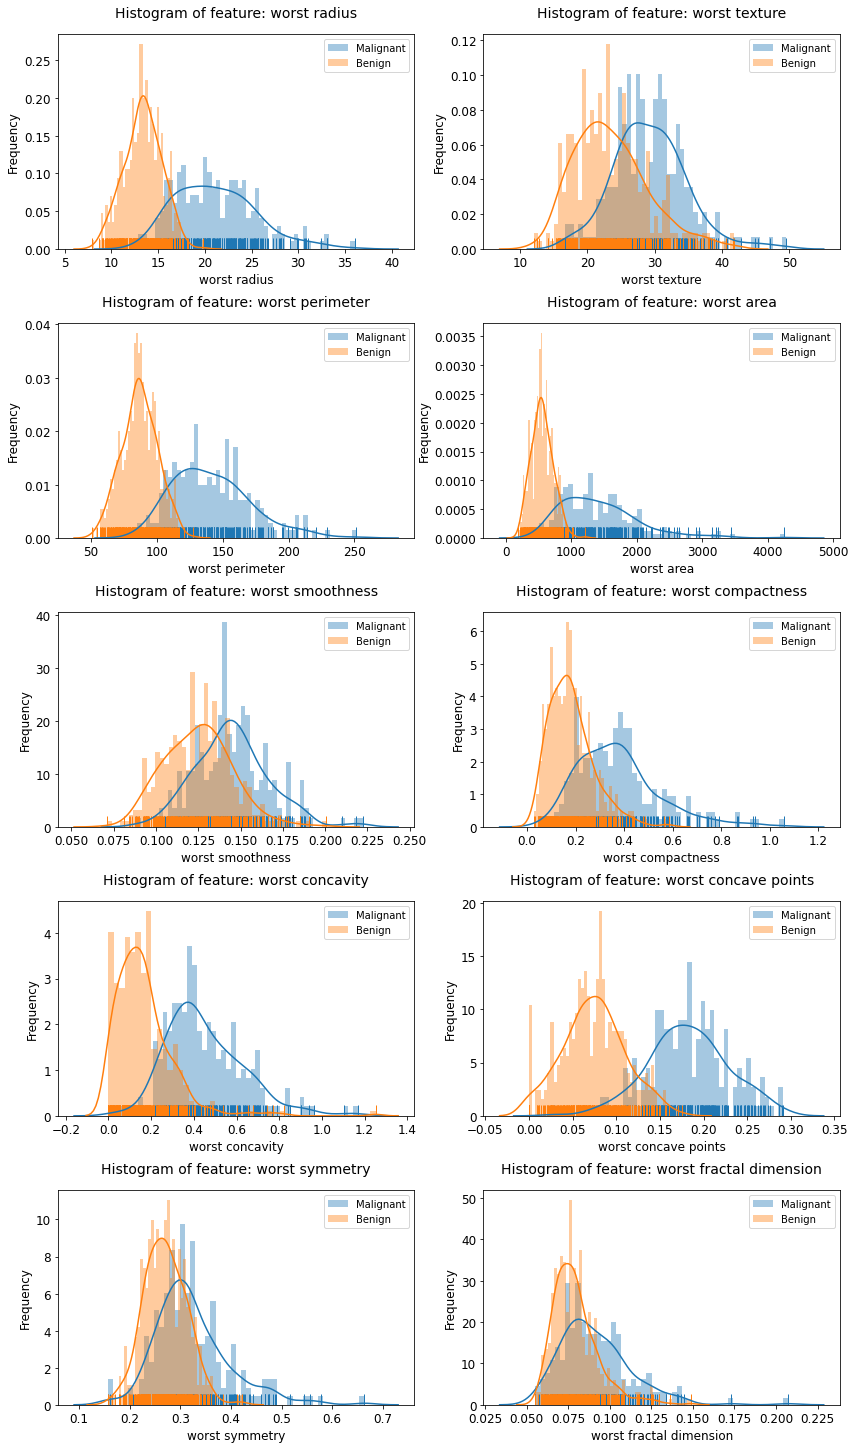

In [15]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 2)
for i, cn in enumerate(cancer_df.iloc[:,20:30]):
    ax = plt.subplot(gs[i])
    sns.distplot(cancer_df[cn][cancer_df['target'] == 0.0], rug=True, label="Malignant", bins=50)
    sns.distplot(cancer_df[cn][cancer_df['target'] == 1.0], rug=True, label="Benign", bins=50)
    ax.set_title('Histogram of feature: ' + str(cn), fontsize=14, y=1.05)
    ax.set_xlabel(str(cn), fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.legend()
plt.tight_layout()
plt.show()

From the plots above, we can see that the distributions of malignant and benign in 'worst texture', 'worst compactness', 'worst smoothness', 'worst symmetry' and 'worst fractal dimension' are mixed so it is hard to classfy while using these features. 

The other five features: worst perimeter,  worst area,  worst concave points, worst radius and worst concavity, look like more clear in terms of classification.

#### Answer:
In this stage, there are 13 features look like more clear in terms of classification:
mean concave points, mean perimeter, mean concavity, mean area, mean radius, area error, radius error, perimeter error, worst perimeter,  worst area,  worst concave points, worst radius and worst concavity.

1.3	Plot receiver-operating-characteristic (ROC) curves of the individual features into 3 figures, one figure for each of the groups of 10.

In [16]:
def plot_roc_curve(fpr, tpr, label):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--") # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel("False Positive Rate (Fall-Out)", fontsize=12)
    plt.ylabel("True Positive Rate (Recall)", fontsize=12)    
    plt.grid(True)        

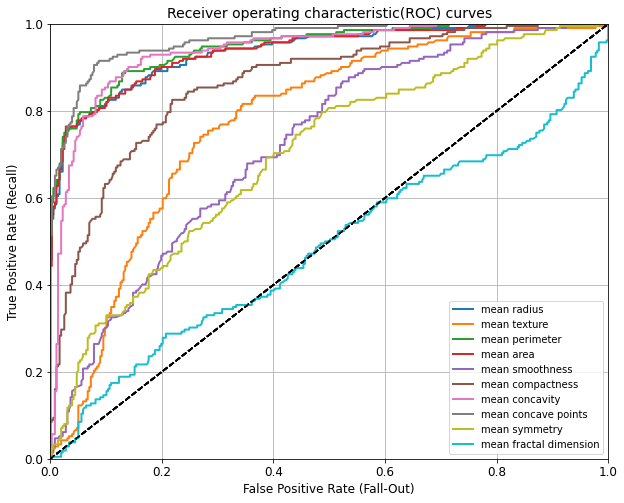

In [17]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(10, 8))                    
for i, cn in enumerate(cancer_df.iloc[:,0:10]):  
    fpr, tpr, thresholds = roc_curve(cancer_df["target"], cancer_df[str(cn)], pos_label=0)
    plot_roc_curve(fpr, tpr, str(cn))
plt.title("Receiver operating characteristic(ROC) curves", fontsize=14)
plt.legend(loc="lower right")
plt.show()

Top five features: mean concave points, mean perimeter, mean concavity, mean area and mean radius.

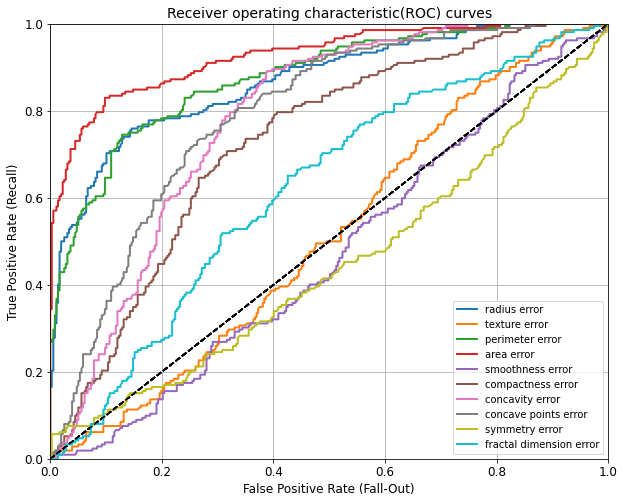

In [18]:
plt.figure(figsize=(10, 8))                    
for i, cn in enumerate(cancer_df.iloc[:,10:20]):  
    fpr, tpr, thresholds = roc_curve(cancer_df["target"], cancer_df[str(cn)], pos_label=0)
    plot_roc_curve(fpr, tpr, str(cn))
plt.title("Receiver operating characteristic(ROC) curves", fontsize=14)
plt.legend(loc="lower right")
plt.show()

Top three features: area error, radius error, perimeter error.

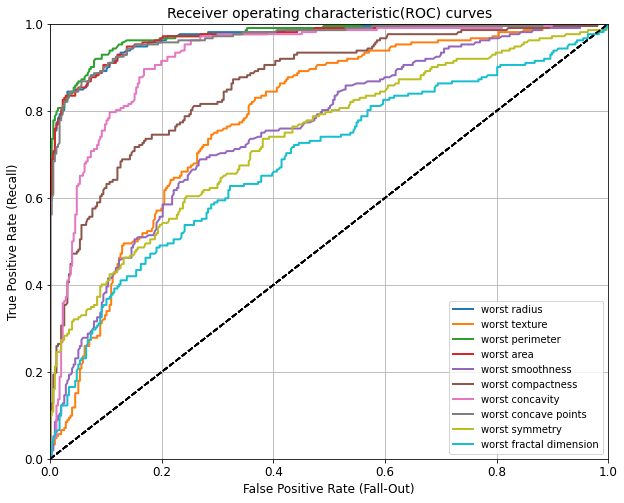

In [19]:
plt.figure(figsize=(10, 8))                    
for i, cn in enumerate(cancer_df.iloc[:,20:30]):  
    fpr, tpr, thresholds = roc_curve(cancer_df["target"], cancer_df[str(cn)], pos_label=0)
    plot_roc_curve(fpr, tpr, str(cn))
plt.title("Receiver operating characteristic(ROC) curves", fontsize=14)
plt.legend(loc="lower right")
plt.show()

Top four features: worst perimeter, worst area, worst concave points, worst radius.

#### Answer:
In this stage, there are 12 features look like more clear in terms of classification:
mean concave points, mean perimeter, mean concavity, mean area, mean radius, area error, radius error, perimeter error, worst perimeter, worst area, worst concave points and worst radius.

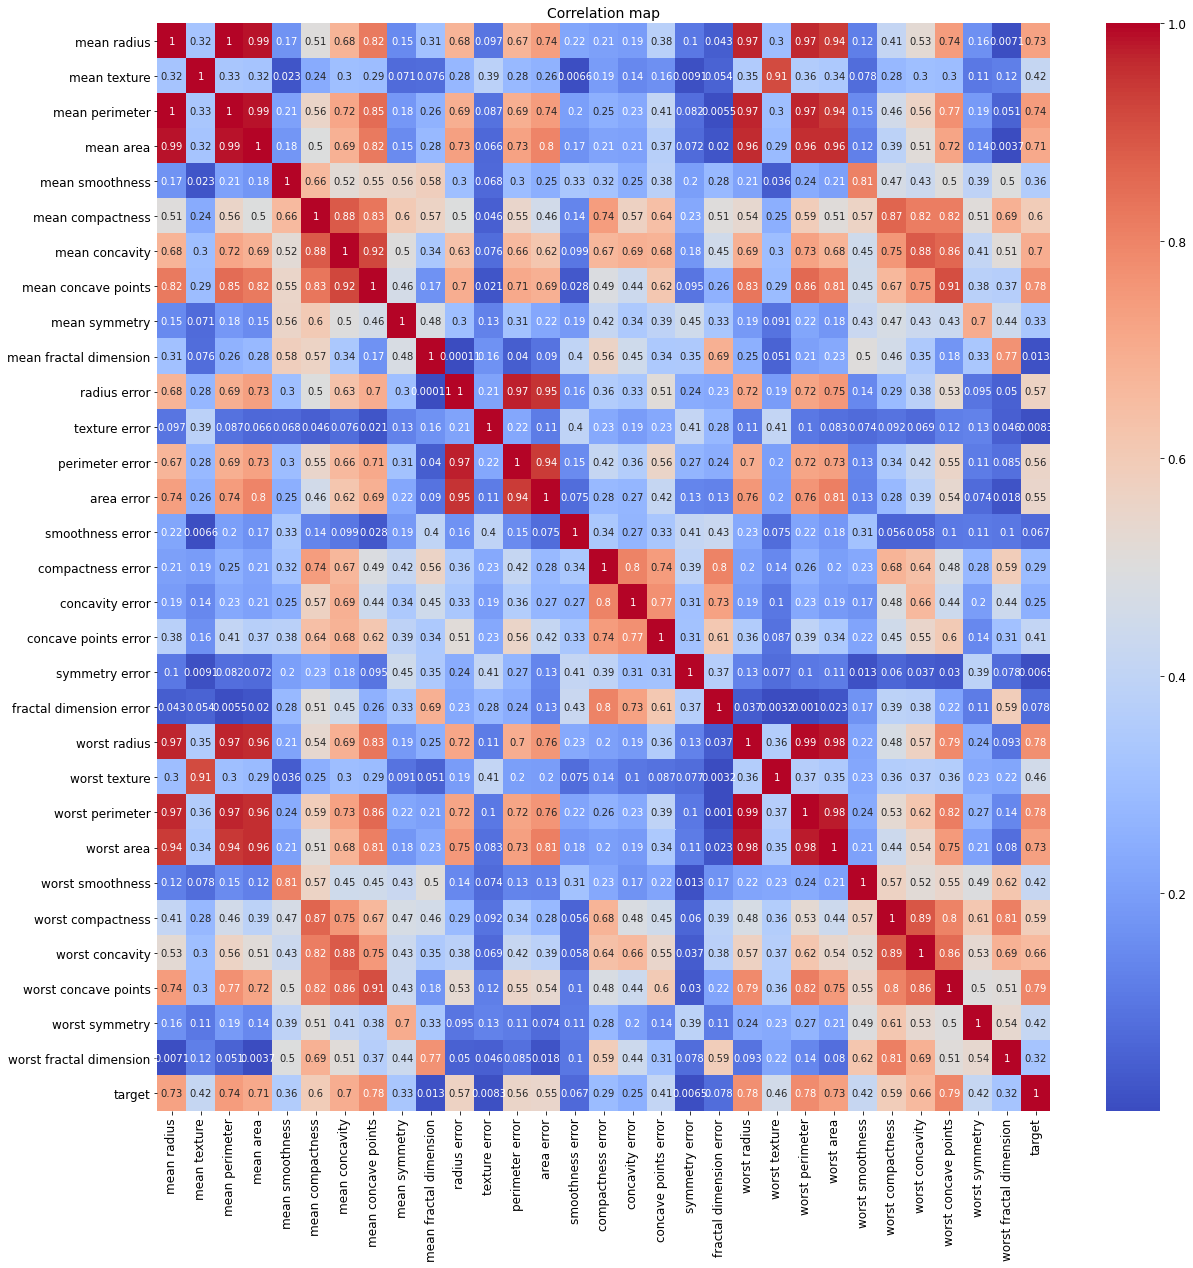

In [20]:
# Calculate the correlation of all attributes
corr_matrix = cancer_df.corr().abs()
plt.figure(figsize=(20, 20))
plt.title("Correlation map", fontsize=14)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

1.4	Question: Which of the parameters seems promising based on the histograms and ROC curves? Justify your choice while referring to the particular features in the figures that indicate a good separation. Choose your top five candidate features.

#### Answer:
Top five candidate features: worst concave points, worst area, area error, mean area, worst compactness.

The seperation of worst concave points is pretty good, so I will choose this feature as top 1. As we can see in heatmap figure, worst radius, worst perimeter and worst area are correlated with each other so I will choose only worst area, because from the distribution figure, the seperation of worst area looks a little bit clear/better than others. While from mean radius, mean perimeter and mean area I will choose mean area only for the same reason. The stuation is the same between area error, radius error, perimeter error, so I will choose only area error because the ROC curve is the best one. On the other hand, the extreme values are more important so I intend to choose the last feature from the 10 features, because worst concave points and worst concavity are correlated and I chose worst concave points in the beginning, the last feature I'd like to choose will be worst compactness.

1.5	Analysis Point: Calculate the mean of all instances of the malignant class (centre of mass in high dimensional feature space) and the mean of all instances of the benign class. Save the mean between those two as the “Analysis Point”. It is a point in the feature space that is approximately between both classes.

In [21]:
M = cancer_df[cancer_df['target'] == 0.0]
B = cancer_df[cancer_df['target'] == 1.0]
malignant = M.drop(columns=['target'])
benign = B.drop(columns=['target'])
malignant_mean = malignant.describe().mean()
benign_mean = benign.describe().mean()
analysis_point = (malignant_mean+benign_mean)/2
analysis_point_df = pd.DataFrame(analysis_point)
analysis_point_df

,0
mean radius,47.257802
mean texture,51.645423
mean perimeter,112.057055
mean area,671.208857
mean smoothness,35.639845
mean compactness,35.661909
mean concavity,35.673012
mean concave points,35.612243
mean symmetry,35.707927
mean fractal dimension,35.612872


2	Train a decision tree classifier (15%)

2.1	Construct a decision tree classifier using the gini criterion and random_state=0. Below, you will perform a hyper parameter search of max_depth and min_samples_leaf. Check the following remaining parameters of the classifier and either keep the default value or select a different value: min_samples_split, min_weight_fraction_leaf, max_features, max_leaf_nodes, min_impurity_decrease, min_impurity_split and class_weight. Question: Describe each choice briefly in one sentence.

In [22]:
# Split the data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=cancer_df.target, random_state=0)

In [23]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (455, 30)
y_train shape: (455,)
X_test shape: (114, 30)
y_test shape: (114,)


In [24]:
# Baseline checking
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier(criterion="gini", random_state=0)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [25]:
print("Train score:", tree_clf.score(X_train, y_train))
print("Test score:", tree_clf.score(X_test, y_test))

Train score: 1.0
Test score: 0.9385964912280702


According to the output, we can see that the score of train data set is 1.0, which indicates a overfitting model.

In [26]:
# Define a function to calculate cv score
def cv_score_d(d):
    clf = tree.DecisionTreeClassifier(max_depth=d, random_state=0)
    clf.fit(X_train, y_train)
    return(clf.score(X_train, y_train), clf.score(X_test, y_test))

In [27]:
# Find the best depth from a range of 1 to 10
depths = np.arange(1,10)
scores_d = [cv_score_d(d) for d in depths]
tr_scores_d = [s[0] for s in scores_d]
te_scores_d = [s[1] for s in scores_d]

# Find the index with the highest score
tr_best_index_d = np.argmax(tr_scores_d)
te_best_index_d = np.argmax(te_scores_d)

print("Best depth:", te_best_index_d+1)
print("Best depth score:", te_scores_d[te_best_index_d])

Best depth: 5
Best depth score: 0.9473684210526315


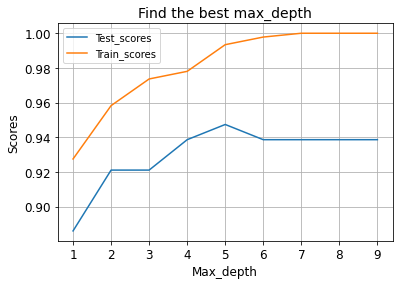

In [28]:
# Plot the result out to be more clear to see
%matplotlib inline
plt.figure()
plt.grid()
plt.xlabel('Max_depth', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Find the best max_depth', fontsize=14)
plt.plot(depths, te_scores_d, label='Test_scores')
plt.plot(depths, tr_scores_d, label='Train_scores')
plt.legend()

In [29]:
# Define a function to calculate cv score
def cv_score_l(l):
    clf = tree.DecisionTreeClassifier(max_depth=5, min_samples_leaf=l, random_state=0)
    clf.fit(X_train, y_train)
    return(clf.score(X_train, y_train), clf.score(X_test, y_test))

In [30]:
# Find the best min samples leaf from a range of 1 to 20
leaves = np.arange(1,20)
scores_l = [cv_score_l(d) for d in leaves]
tr_scores_l = [s[0] for s in scores_l]
te_scores_l = [s[1] for s in scores_l]

# Find the index with the highest score
tr_best_index_l = np.argmax(tr_scores_l)
te_best_index_l = np.argmax(te_scores_l)

print("Best min samples leaf:", te_best_index_l+1)
print("Best min samples leaf score:", te_scores_l[te_best_index_l])

Best min samples leaf: 1
Best min samples leaf score: 0.9473684210526315


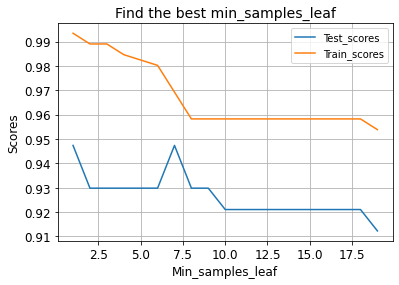

In [31]:
# Plot the result out to be more clear to see
%matplotlib inline
plt.figure()
plt.grid()
plt.xlabel('Min_samples_leaf', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Find the best min_samples_leaf', fontsize=14)
plt.plot(leaves, te_scores_l, label='Test_scores')
plt.plot(leaves, tr_scores_l, label='Train_scores')
plt.legend()

In [32]:
# Use Randomized Search to find the best parameter
# All the range of parameters were based on the reference attached below
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
        'min_samples_split': np.arange(1,40),
        'min_weight_fraction_leaf': np.linspace(0, 0.5, 100),
        'max_features': [None, 'auto', 'sqrt', 'log2'],
        # The number of samples is not too much   
        # 'max_leaf_nodes':None,
        'min_impurity_decrease': np.linspace(0, 0.2, 100),
        'min_impurity_split': np.arange(1,10),
        'class_weight': [None, "balanced"]
    }
tree_clf_RS = tree.DecisionTreeClassifier(max_depth=5, min_samples_leaf=1, random_state=0)
rnd_search = RandomizedSearchCV(tree_clf_RS, param_distributions=param_distribs, n_iter=10, cv=5, scoring='accuracy', random_state=0)
rnd_search.fit(X_train, y_train.values.ravel())

/home/moazmohamed/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/home/moazmohamed/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/home/moazmohamed/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/home/moazmohamed/anaconda3/lib/python3.7/site-packages/sklearn/tree/_cla

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=5,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=0,
                

[1] Mukesh Mithrakumar, 2019. How to tune a Decision Tree?

https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680

In [33]:
rnd_search.best_params_

{'min_weight_fraction_leaf': 0.020202020202020204,
 'min_samples_split': 33,
 'min_impurity_split': 2,
 'min_impurity_decrease': 0.07474747474747474,
 'max_features': 'sqrt',
 'class_weight': None}

In [34]:
rnd_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.07474747474747474,
                       min_impurity_split=2, min_samples_leaf=1,
                       min_samples_split=33,
                       min_weight_fraction_leaf=0.020202020202020204,
                       presort='deprecated', random_state=0, splitter='best')

In [35]:
from sklearn.model_selection import cross_val_score
rnd_search_tree_scores = cross_val_score(rnd_search.best_estimator_,X_train, y_train,
                cv=5, scoring="accuracy")
print("RndSearch training set accuracy: {:}".format(rnd_search_tree_scores.mean()))

RndSearch training set accuracy: 0.6263736263736264


/home/moazmohamed/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/home/moazmohamed/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/home/moazmohamed/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/home/moazmohamed/anaconda3/lib/python3.7/site-packages/sklearn/tree/_cla

#### Answer:
The best max_depth is 5 and the best min_samples_leaf is 1. 

The best max_depth is 5 means the length of the longest path from the tree root to a leaf is 5. In general, the deeper we allow a tree to grow, the more complex the model will become because it will have more splits and capture more information about the data and this is one of the root causes of overfitting in decision trees because the model will fit perfectly for the training data and will not be able to generalize well on test set. So, if the model is overfitting, we can reduce the number for max_depth. But if the depth is too low, the model will underfit. So I let the model decide the max_depth first and then by comparing the train and test scores to look for overfitting or underfitting and depending on the degree to decrease or increase the max_depth.

The best min_samples_leaf is 1 means the minimum number of samples required to be at a leaf node is 1. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression. Min_samples_leaf is used to control overfitting by defining that each leaf has more than one element. A very small number will usually mean the tree will overfit, whereas a large number will prevent the tree from learning the data and this should make sense.
 
The best parameters are: 

'min_weight_fraction_leaf': 0.020202020202020204,\
The minimum weighted fraction of the sum total of weights required to be at a leaf node. The defalut value means samples have equal weight.

'min_samples_split': 33.\
Min_samples_split is the minimum number of samples required to split an internal node and it is used to control over-fitting. The defalut value means consider 2 as the minimum number.

'min_impurity_split': 2,\
Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.

'max_leaf_nodes': None,\
Plant trees with max_leaf_nodes in the best priority. The defalut value means the number of leaf nodes is not limited.

'min_impurity_decrease': 0.07474747474747474,\
A node will be split if this split induces a decrease of the impurity greater than or equal to min_impurity_decrease. It can help us control how deep our tree grows based on the impurity. 

'max_features': 'sqrt',\
Max_features is the number of features to consider when looking for the best split. We can use it to check some features and  limit overfitting, by choosing a reduced number of features we can increase the stability of the tree and reduce variance and over-fitting. The defalut value means max_features=n_features.

'class_weight': None
class_weight is used to provide a weight or bias for each output class. The defalut value means all classes are supposed to have weight one. 

All choices are based on Randomised search and all initial ranges were set according to Mukesh's research[1].

#### Notice: Although I used the randomised Search to find the best parameters, the performance is really bad when I test it on the test set. So I decided to not change other parameters.

2.2	Build a pipeline including any pre-processing steps that you think are necessary. Question: Do the data need to be scaled for decision tree classification? Are the different class sizes a problem, and if so what are you doing about it?

In [36]:
# Build a pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

pipe_steps = [('decsT', DecisionTreeClassifier(random_state=0))]

check_params = {'decsT__max_depth':np.arange(1, 20),'decsT__min_samples_leaf':np.arange(1, 10)}

pipeline = Pipeline(pipe_steps)

print(pipeline)

Pipeline(memory=None,
         steps=[('decsT',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=0,
                                        splitter='best'))],
         verbose=False)


#### Answer:
I didn't put the scaler into the pipeline, because it won't make any difference. The performance of some machine learning algorithms could be improved if a standardised dataset is being used, while some algorithms (such as those based on decision trees) do not need normalised inputs, and can cope with features that have different inherent scales. 

The different class sizes would be a problem but not for this dataset when we use Decision tree classifier. In the exploratory section, we can see that all class sizes are exaclty the same and the dataset has no invalid values, so no problem need to be fixed. The classes are slightly imbalance, it is not neccessary to deal with it. The conclusion can be proved by the reslut of RandomSreach('class_weight': None), which means the class_weight doean't matter so much. However, for imbalanced data, there are three methods we can use: 
1. Resampling: oversampling a minority class, undersampling the majority class, or even generating new samples.
2. Weighting the cost function: we can assign weights to our class labels such that the cost function penalizes loss on certain classes more severely. This can make the model adapt better to the characteristics of a minority class.
3. Adjusting the decision threshold: once we have predicted probabilities, instead of using a default 50%+ decision to assign predicted labels, we can try lowering the threshold to improve recall of a minority class / optimize F1.


2.3	Perform a grid search using five-fold cross validation over values of the maximum depth (max_depth) and the minimum number of samples per leaf (min_samples_leaf). Choose the value range yourself. Question: What is the rationale for your choice?

In [37]:
# Perform a grid search
from sklearn.model_selection import GridSearchCV

grid_search_tree = GridSearchCV(pipeline,
                                param_grid=check_params, cv=5, scoring='accuracy')

grid_search_tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('decsT',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_samples_split=2,
                                       

In [38]:
grid_search_tree.best_params_

{'decsT__max_depth': 4, 'decsT__min_samples_leaf': 1}

In [39]:
grid_search_tree.best_estimator_

Pipeline(memory=None,
         steps=[('decsT',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=4,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=0,
                                        splitter='best'))],
         verbose=False)

In [40]:
from sklearn.model_selection import cross_val_score

tree_scores = cross_val_score(grid_search_tree.best_estimator_, X_train, y_train,
                cv=5, scoring="accuracy")
tree_scores

array([0.93406593, 0.95604396, 0.94505495, 0.96703297, 0.94505495])

In [41]:
tree_scores.mean()

0.9494505494505494

#### Answer:
There are different values possible for both of these parameters so I made a grid and selected the best results by selecting the best values of both of these parameters using cross validation. In my Grid Search process, I use accuracy score as the metric to decide whether the parameter is good or not, which means a higher accuracy score indicates a better model performance. I used f1 score before, but after my reseach I found that accuracy can be used when the class distribution is similar while F1-score is a better metric when there are imbalanced classes as in the above case, so accuracy will be the better choice.

#### Notice: Because the GridSearch is counting two parameters in the same time, so I consider the result of GridSearch is better than previous methods. In next stage I will use max_depth=4 and min_samples_leaf=1 as my final classifier.

3	Evaluate the decision tree classifier (20%)

3.1	Calculate the confusion matrix, precision and recall of the final classifier. Question:  Based on these metrics, what is the chance of failing to detect a sample with cancer? What are the strengths and weaknesses of the classifier?

In [42]:
tree_clf_final = DecisionTreeClassifier(random_state=0, max_depth=4, min_samples_leaf=1)
tree_clf_final.fit(X_train, y_train)

y_pred_tree = tree_clf_final.predict(X_test)
y_pred_tree

array([0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.])

Text(30.0, 0.5, 'True')

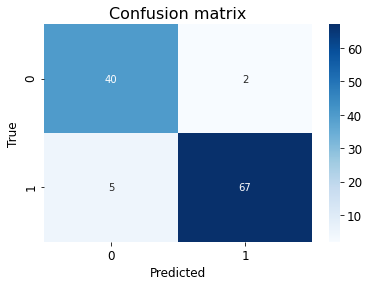

In [43]:
# Plot the confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm_tree = confusion_matrix(y_test, y_pred_tree)
f = sns.heatmap(cm_tree, cmap=plt.cm.Blues, annot=True)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_tree, target_names=['malignant','benigh']))

              precision    recall  f1-score   support

   malignant       0.89      0.95      0.92        42
      benigh       0.97      0.93      0.95        72

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



#### Answer:
Based on these metrics, what is the chance of failing to detect a sample with cancer? What are the strengths and weaknesses of the classifier?

Recall gives us an idea about when it’s actually yes, how often does it predict yes, so the chance of failing to detect a sample with cancer is 5%.

3.2	Display decision tree using plot_tree(). Question: Describe the structure. What do each of the entries in the first node mean? Are the features in the decision tree matching the initial candidate features from Section 1?

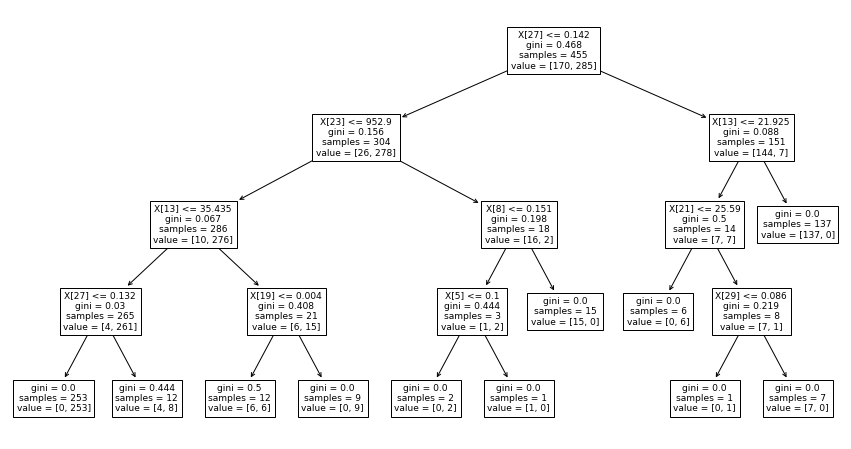

<Figure size 432x288 with 0 Axes>

In [46]:
# Using plot_tree() to plot the tree

fig, ax = plt.subplots(figsize=(15, 8))
tree.plot_tree(tree_clf_final)
plt.show()
plt.savefig('tree_high_dpi', dpi=200)

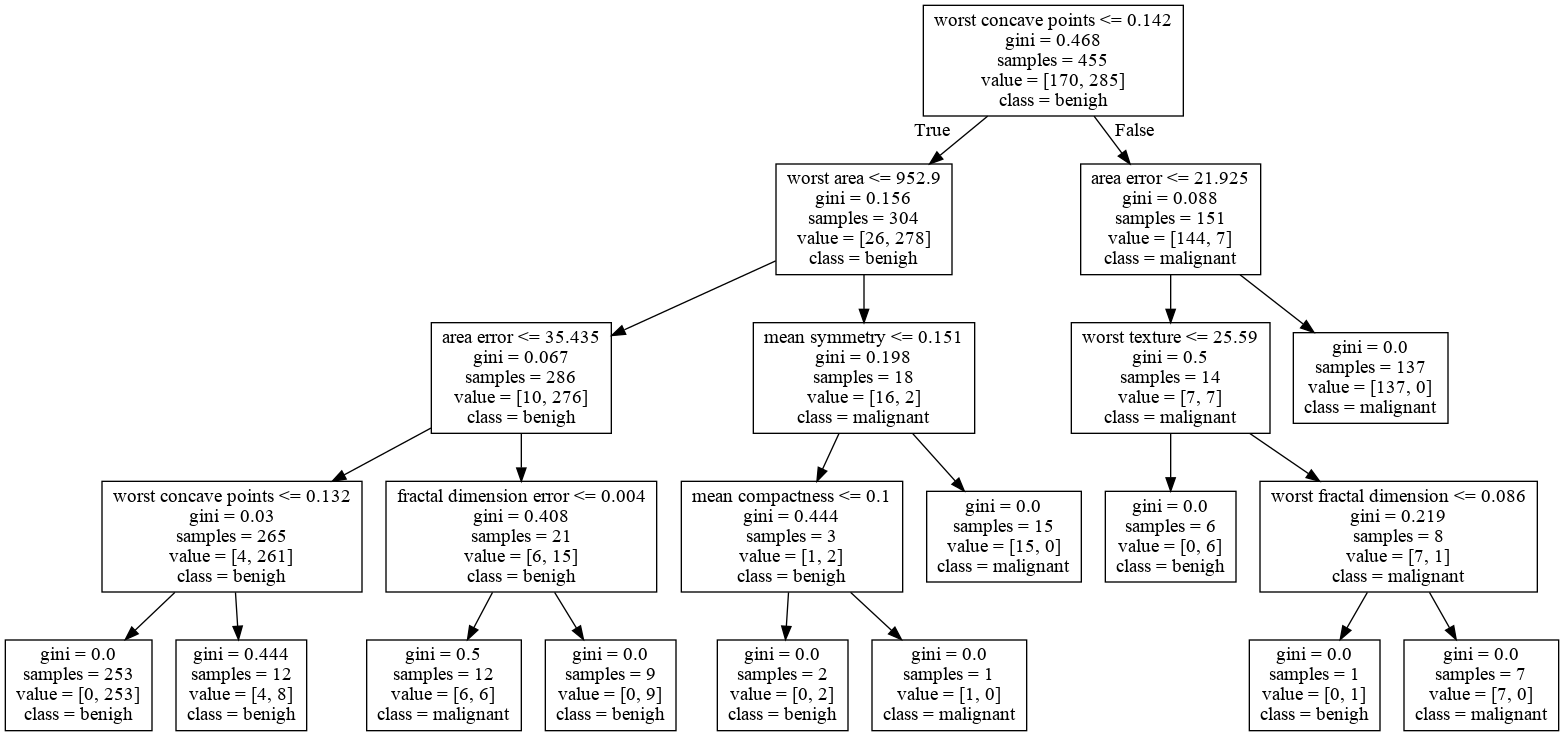

In [47]:
# Using a better way to plot a beautiful tree
from IPython.display import Image

import pydotplus
# Create DOT data
dot_data = tree.export_graphviz(tree_clf_final, out_file=None, 
                                feature_names=cancer.feature_names,  
                                class_names=['malignant','benigh'])
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

#### Answer:
Description: A decision tree is a flowchart-like structure in which each internal node represents a “test” on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.

The root node represents the entire population or sample and this further gets divided into two or more homogeneous sets. In this node(depth=0), the feature that best split the different classes of the data is the worst concave points, using as a threshold a value of 0.142. This results in two nodes, one with Gini 0.156 and one with Gini of 0.088, where the two other kinds of cancers are grouped.

worst concave points <=0.412: The first question the decision tree ask is if the value of worst concave points is less than 0.412. Based on the result, it either follows the true or the false path.

gini = 0.468: The gini score is a metric that quantifies the purity of the node/leaf (more about leaves in a bit). A gini score greater than zero implies that samples contained within that node belong to different classes. A gini score of zero means that the node is pure, that within that node only a single class of samples exist. 

samples = 455: Since the cancer data train set contains 455 samples, this value is set to 455.

value = [170,285]: The value list tells us how many samples at the given node fall into each category. The first element of the list shows the number of samples that belong to the benigh class, the second element of the list shows the number of samples that belong to the malignant class.

class = benigh: The class value shows the prediction a given node will make and it can be determined from the value list. 

The top five features in the decision tree are worst concave points, worst area, area error, worst texture and fractal dimension error, three of them are matching the initial candidate features from Section 1(worst concave points, worst area, area error, mean area, worst compactness).

3.3	Display the decision boundaries (use function predict()) together with a scatter plot of the data using two features at a time. 

In [48]:
# Check feature importance
tree_clf_final.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00661265, 0.        , 0.        , 0.01102109, 0.        ,
       0.        , 0.        , 0.        , 0.04563235, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01275297,
       0.        , 0.02603731, 0.        , 0.12248139, 0.        ,
       0.        , 0.        , 0.76678313, 0.        , 0.0086791 ])

In [49]:
# Find top five features
feature_importances_zip = zip(X.columns, tree_clf_final.feature_importances_, X.index)
sorted(feature_importances_zip, key = lambda x:x[1], reverse=True)

[('worst concave points', 0.7667831331824025, 27),
 ('worst area', 0.12248139456627294, 23),
 ('area error', 0.04563234638084043, 13),
 ('worst texture', 0.026037314246266763, 21),
 ('fractal dimension error', 0.012752970243069432, 19),
 ('mean symmetry', 0.011021085395245189, 8),
 ('worst fractal dimension', 0.008679104748755587, 29),
 ('mean compactness', 0.006612651237147113, 5),
 ('mean radius', 0.0, 0),
 ('mean texture', 0.0, 1),
 ('mean perimeter', 0.0, 2),
 ('mean area', 0.0, 3),
 ('mean smoothness', 0.0, 4),
 ('mean concavity', 0.0, 6),
 ('mean concave points', 0.0, 7),
 ('mean fractal dimension', 0.0, 9),
 ('radius error', 0.0, 10),
 ('texture error', 0.0, 11),
 ('perimeter error', 0.0, 12),
 ('smoothness error', 0.0, 14),
 ('compactness error', 0.0, 15),
 ('concavity error', 0.0, 16),
 ('concave points error', 0.0, 17),
 ('symmetry error', 0.0, 18),
 ('worst radius', 0.0, 20),
 ('worst perimeter', 0.0, 22),
 ('worst smoothness', 0.0, 24),
 ('worst compactness', 0.0, 25),
 ('w

In [57]:
drop_list = ['mean texture','worst smoothness','mean concavity','mean radius','mean perimeter','mean area'
              ,'mean smoothness','mean compactness','mean concave points','mean symmetry','mean fractal dimension',
              'radius error','texture error','perimeter error','smoothness error','compactness error',
              'concavity error','concave points error','symmetry error','worst radius','worst perimeter',
              'worst compactness','worst concavity','worst symmetry','worst fractal dimension']

# Do not modify X, we will use it later 
X_1 = X.drop(drop_list,axis = 1)       
X_1.head()

,area error,fractal dimension error,worst texture,worst area,worst concave points
0,153.40,0.006193,17.33,2019.0,0.2654
1,74.08,0.003532,23.41,1956.0,0.1860
2,94.03,0.004571,25.53,1709.0,0.2430
3,27.23,0.009208,26.50,567.7,0.2575
4,94.44,0.005115,16.67,1575.0,0.1625


In [58]:
# Do not modify X, we will use it later 
cancer_1 = cancer_df.drop(drop_list,axis = 1)       
cancer_1.head()
cancer_1_X=cancer_1.drop(['target'],axis=1)
cancer_1_X

,area error,fractal dimension error,worst texture,worst area,worst concave points
0,153.40,0.006193,17.33,2019.0,0.2654
1,74.08,0.003532,23.41,1956.0,0.1860
2,94.03,0.004571,25.53,1709.0,0.2430
3,27.23,0.009208,26.50,567.7,0.2575
4,94.44,0.005115,16.67,1575.0,0.1625
...,...,...,...,...,...
564,158.70,0.004239,26.40,2027.0,0.2216
565,99.04,0.002498,38.25,1731.0,0.1628
566,48.55,0.003892,34.12,1124.0,0.1418
567,86.22,0.006185,39.42,1821.0,0.2650


In [59]:
ap_df_t = analysis_point_df.T
ap_df = pd.concat([ap_df_t]*569,ignore_index=True)
ap_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,47.257802,51.645423,112.057055,671.208857,35.639845,35.661909,35.673012,35.612243,35.707927,35.612872,...,49.297941,56.818721,127.067213,944.975308,35.668599,35.818889,35.882005,35.662628,35.803967,35.635739
1,47.257802,51.645423,112.057055,671.208857,35.639845,35.661909,35.673012,35.612243,35.707927,35.612872,...,49.297941,56.818721,127.067213,944.975308,35.668599,35.818889,35.882005,35.662628,35.803967,35.635739
2,47.257802,51.645423,112.057055,671.208857,35.639845,35.661909,35.673012,35.612243,35.707927,35.612872,...,49.297941,56.818721,127.067213,944.975308,35.668599,35.818889,35.882005,35.662628,35.803967,35.635739
3,47.257802,51.645423,112.057055,671.208857,35.639845,35.661909,35.673012,35.612243,35.707927,35.612872,...,49.297941,56.818721,127.067213,944.975308,35.668599,35.818889,35.882005,35.662628,35.803967,35.635739
4,47.257802,51.645423,112.057055,671.208857,35.639845,35.661909,35.673012,35.612243,35.707927,35.612872,...,49.297941,56.818721,127.067213,944.975308,35.668599,35.818889,35.882005,35.662628,35.803967,35.635739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,47.257802,51.645423,112.057055,671.208857,35.639845,35.661909,35.673012,35.612243,35.707927,35.612872,...,49.297941,56.818721,127.067213,944.975308,35.668599,35.818889,35.882005,35.662628,35.803967,35.635739
565,47.257802,51.645423,112.057055,671.208857,35.639845,35.661909,35.673012,35.612243,35.707927,35.612872,...,49.297941,56.818721,127.067213,944.975308,35.668599,35.818889,35.882005,35.662628,35.803967,35.635739
566,47.257802,51.645423,112.057055,671.208857,35.639845,35.661909,35.673012,35.612243,35.707927,35.612872,...,49.297941,56.818721,127.067213,944.975308,35.668599,35.818889,35.882005,35.662628,35.803967,35.635739
567,47.257802,51.645423,112.057055,671.208857,35.639845,35.661909,35.673012,35.612243,35.707927,35.612872,...,49.297941,56.818721,127.067213,944.975308,35.668599,35.818889,35.882005,35.662628,35.803967,35.635739


In [60]:
X_1_key=X_1.iloc[:,:2].keys()
xx_df=X_1.iloc[:,:1]
xx=xx_df.values
yy_df=X_1.iloc[:,1:2]
yy=yy_df.values
new=np.c_[xx.ravel(), yy.ravel()]
new_df=pd.DataFrame(new,columns=X_1_key)
new_df
#xx.keys()
new1=pd.concat([new_df,ap_df.drop(X_1_key,axis=1)],axis=1)
new1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area error               569 non-null    float64
 1   fractal dimension error  569 non-null    float64
 2   mean radius              569 non-null    float64
 3   mean texture             569 non-null    float64
 4   mean perimeter           569 non-null    float64
 5   mean area                569 non-null    float64
 6   mean smoothness          569 non-null    float64
 7   mean compactness         569 non-null    float64
 8   mean concavity           569 non-null    float64
 9   mean concave points      569 non-null    float64
 10  mean symmetry            569 non-null    float64
 11  mean fractal dimension   569 non-null    float64
 12  radius error             569 non-null    float64
 13  texture error            569 non-null    float64
 14  perimeter error          5

In [61]:
X_1_key=X_1.iloc[:,:2].keys()
X_1_key[1]

'fractal dimension error'

In [62]:
next(iter(X_1_key))

'area error'

np.c_[xx.ravel(), yy.ravel()]
  X0, X1 =  X.iloc[:, 0], X.iloc[:, 0]
    xx, yy = make_meshgrid(X0, X1)
# title for the plots
    titles = ('worst concave points vs worst area',
          'worst concave points vs area error',
          'worst concave points vs worst texture',
          'worst concave points vs fractal dimension error',
          'worst area vs area error',
          'worst area vs worst texture',
          'worst area vs fractal dimension error',
          'area error vs worst texture',
          'area error vs fractal dimension error',
          'worst texture vs fractal dimension error')



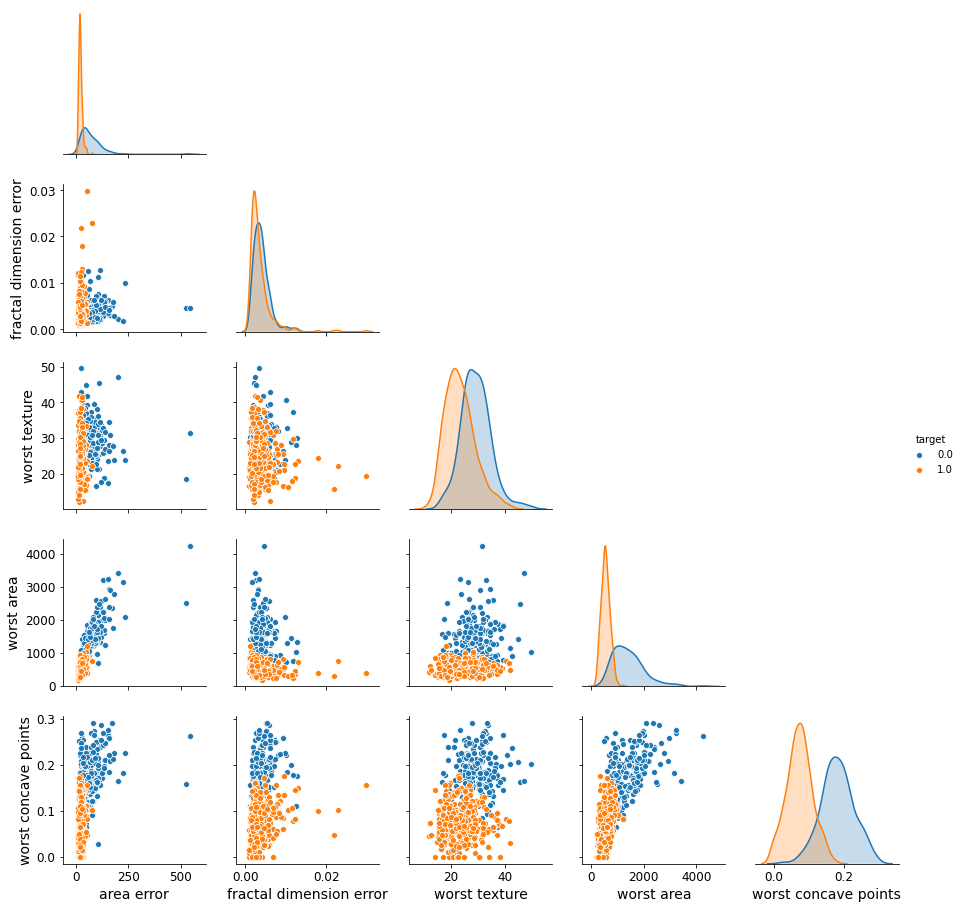

In [63]:
sns.pairplot(cancer_1,corner=True,hue='target')

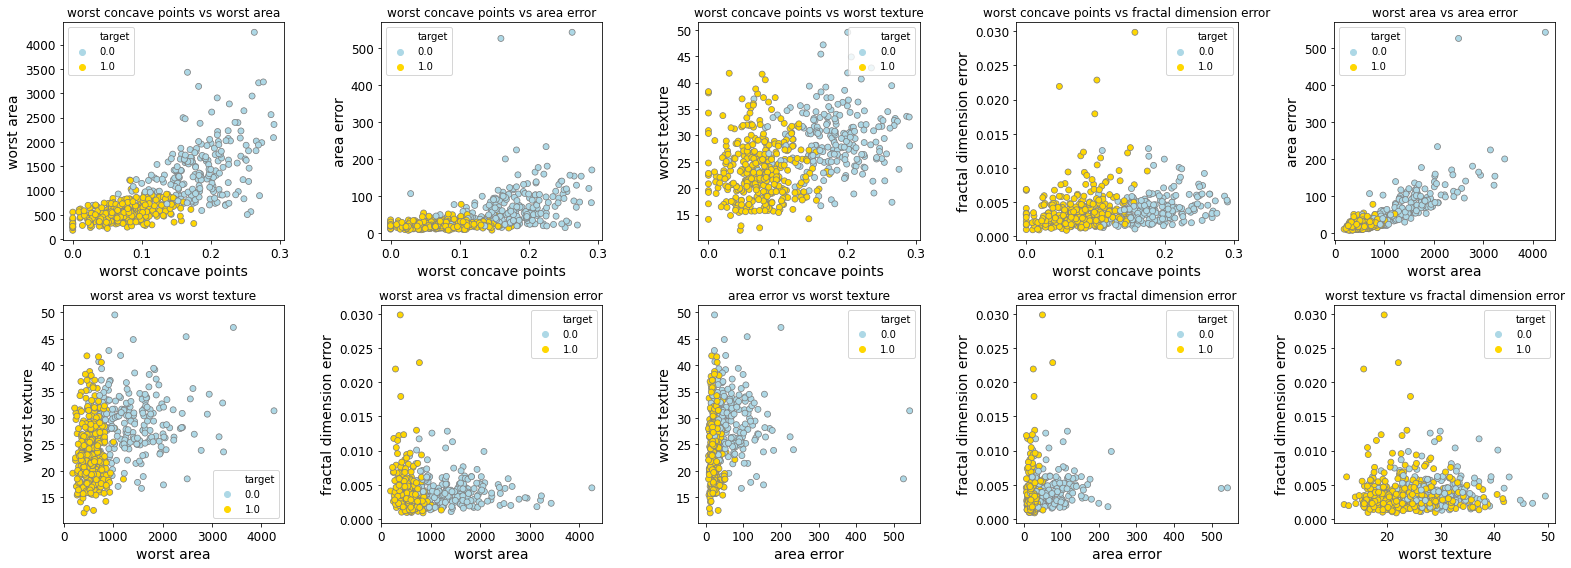

In [64]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'grey'

# Plot +
fig = plt.figure(figsize=(22,8))

plt.subplot(2,5,1)
ax1 = sns.scatterplot(x = X_1['worst concave points'], y = X_1['worst area'], hue = 'target',
                    data = cancer_df, palette = palette, edgecolor=edgecolor)
plt.title('worst concave points vs worst area')
plt.subplot(2,5,2)
ax2 = sns.scatterplot(x = X_1['worst concave points'], y = X_1['area error'], hue = 'target',
                    data = cancer_df, palette =palette, edgecolor=edgecolor)
plt.title('worst concave points vs area error')
plt.subplot(2,5,3)
ax3 = sns.scatterplot(x = X_1['worst concave points'], y = X_1['worst texture'], hue = 'target',
                    data = cancer_df, palette =palette, edgecolor=edgecolor)
plt.title('worst concave points vs worst texture')
plt.subplot(2,5,4)
ax4 = sns.scatterplot(x = X_1['worst concave points'], y = X_1['fractal dimension error'], hue = 'target',
                    data = cancer_df, palette =palette, edgecolor=edgecolor)
plt.title('worst concave points vs fractal dimension error')

plt.subplot(2,5,5)
ax5 = sns.scatterplot(x = X_1['worst area'], y = X_1['area error'], hue = 'target',
                    data = cancer_df, palette =palette, edgecolor=edgecolor)
plt.title('worst area vs area error')
plt.subplot(2,5,6)
ax6 = sns.scatterplot(x = X_1['worst area'], y = X_1['worst texture'], hue = 'target',
                    data = cancer_df, palette =palette, edgecolor=edgecolor)
plt.title('worst area vs worst texture')
plt.subplot(2,5,7)
ax7 = sns.scatterplot(x = X_1['worst area'], y = X_1['fractal dimension error'], hue = 'target',
                    data = cancer_df, palette =palette, edgecolor=edgecolor)
plt.title('worst area vs fractal dimension error')

plt.subplot(2,5,8)
ax8 = sns.scatterplot(x = X_1['area error'], y = X_1['worst texture'], hue = 'target',
                    data = cancer_df, palette =palette, edgecolor=edgecolor)
plt.title('area error vs worst texture')
plt.subplot(2,5,9)
ax9 = sns.scatterplot(x = X_1['area error'], y = X_1['fractal dimension error'], hue = 'target',
                    data = cancer_df, palette =palette, edgecolor=edgecolor)
plt.title('area error vs fractal dimension error')

plt.subplot(2,5,10)
ax10 = sns.scatterplot(x = X_1['worst texture'], y = X_1['fractal dimension error'], hue = 'target',
                    data = cancer_df, palette =palette, edgecolor=edgecolor)
plt.title('worst texture vs fractal dimension error')

plt.tight_layout()
plt.savefig('1')
plt.show()

In [65]:
def make_meshgrid(x, y, h=0.2):
    
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [66]:
def plot_contours(ax, clf, xx, yy, X_keys, **params):
       
    xx_yy = np.c_[xx.ravel(), yy.ravel()]
    xx_yy_df = pd.DataFrame(xx_yy, columns=X_keys)
    xx_yy_concat = pd.concat([xx_yy_df,ap_df.drop(X_keys, axis=1)],axis=1)
   
    Z = clf.predict(xx_yy_concat)
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

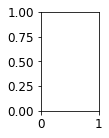

In [68]:
# Take the first two features. We could avoid this by using a two-dim dataset
pairs=[[0, 1], [0, 2], [0, 3],[0, 4], [1, 2], [1, 3], [1,4], [2, 3], [2, 4], [3,4]]

for pair in pairs:
    
    # We only take the two corresponding features
    X = cancer_1_X.iloc[:, pair]
    y = cancer_1.target
    clf = tree_clf_final
    X_keys = X.keys()

    # Set-up 2x5 grid for plotting.
    #fig, sub = plt.subplots(2, 5)
    # Plot the decision boundary
    count = 1
    ax = plt.subplot(2, 5, count)

    X0, X1 =  X.iloc[:, 0], X.iloc[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, X_keys,cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel(X_keys[0])
    ax.set_ylabel(X_keys[1])
    ax.set_title(X_keys[0] + 'vs' + X_keys[1])
    ax.set_xticks(())
    ax.set_yticks(())

    count=count+1
plt.show()


In [ ]:

# Take the first two features. We could avoid this by using a two-dim dataset
X = cancer_1_X.iloc[:, pair]
y = cancer_1.target
clf = tree_clf_final
X_keys = X.keys()

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [ ]:
# Take the first two features. We could avoid this by using a two-dim dataset
#X = cancer.data[:, :2]
#y = cancer.target
clf=DecisionTreeClassifier(random_state=0, max_depth=4, min_samples_leaf=1).fit(X,y)

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],[0, 4], [1, 2], [1, 3], [1,4], [2, 3], [2, 4], [3,4]]):
    # We only take the two corresponding features
    X = cancer_1.iloc[:, pair]
    y = cancer_1.target
# title for the plots
    titles = ('worst concave points vs worst area',
          'worst concave points vs area error',
          'worst concave points vs worst texture',
          'worst concave points vs fractal dimension error',
          'worst area vs area error',
          'worst area vs worst texture',
          'worst area vs fractal dimension error',
          'area error vs worst texture',
          'area error vs fractal dimension error',
          'worst texture vs fractal dimension error')

# Set-up 2x5 grid for plotting.
    fig, sub = plt.subplots(2, 5)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    X0, X1 =  X.iloc[:, 0], X.iloc[:, 0]
    xx, yy = make_meshgrid(X0, X1)

    for title, ax in zip(titles, sub.flatten()):
        plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel('Sepal length')
        ax.set_ylabel('Sepal width')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

plt.show()

In [ ]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],[0, 4], [1, 2], [1, 3], [1,4], [2, 3], [2, 4], [3,4]]):
    # We only take the two corresponding features
    X = cancer_1.iloc[:, pair]
    y = cancer_1.target

    # Train
    #clf = DecisionTreeClassifier().fit(X, y)
    clf=DecisionTreeClassifier(random_state=0, max_depth=4, min_samples_leaf=1).fit(X,y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(cancer_1.iloc[pair[0]])
    plt.ylabel(cancer_1.iloc[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[:, 0], X[:, 1], c=color, label=cancer_1.target,
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.show()

In [ ]:
plt.figure(figsize=(20,8))
plots = []
ax1 = sns.scatterplot(x = X_1['worst concave points'], y = X_1['worst area'], hue = 'target',
                    data = cancer_df, palette = palette, edgecolor=edgecolor)
plt.title('worst concave points vs worst area')

ax2 = sns.scatterplot(x = X_1['worst concave points'], y = X_1['area error'], hue = 'target',
                    data = cancer_df, palette =palette, edgecolor=edgecolor)
plt.title('worst concave points vs area error')

ax3 = sns.scatterplot(x = X_1['worst concave points'], y = X_1['worst texture'], hue = 'target',
                    data = cancer_df, palette =palette, edgecolor=edgecolor)
plt.title('worst concave points vs worst texture')

ax4 = sns.scatterplot(x = X_1['worst concave points'], y = X_1['fractal dimension error'], hue = 'target',
                    data = cancer_df, palette =palette, edgecolor=edgecolor)
plt.title('worst concave points vs fractal dimension error')

ax5 = sns.scatterplot(x = X_1['worst area'], y = X_1['area error'], hue = 'target',
                    data = cancer_df, palette =palette, edgecolor=edgecolor)
plt.title('worst area vs area error')

ax6 = sns.scatterplot(x = X_1['worst area'], y = X_1['worst texture'], hue = 'target',
                    data = cancer_df, palette =palette, edgecolor=edgecolor)
plt.title('worst area vs worst texture')

ax7 = sns.scatterplot(x = X_1['worst area'], y = X_1['fractal dimension error'], hue = 'target',
                    data = cancer_df, palette =palette, edgecolor=edgecolor)
plt.title('worst area vs fractal dimension error')

ax8 = sns.scatterplot(x = X_1['area error'], y = X_1['worst texture'], hue = 'target',
                    data = cancer_df, palette =palette, edgecolor=edgecolor)
plt.title('area error vs worst texture')

ax9 = sns.scatterplot(x = X_1['area error'], y = X_1['fractal dimension error'], hue = 'target',
                    data = cancer_df, palette =palette, edgecolor=edgecolor)
plt.title('area error vs fractal dimension error')

ax10 = sns.scatterplot(x = X_1['worst texture'], y = X_1['fractal dimension error'], hue = 'target',
                    data = cancer_df, palette =palette, edgecolor=edgecolor)
plt.title('worst texture vs fractal dimension error')


for i in range(2):
    for j in range(5):
        ax = plt.subplot2grid((2,5), (i,j))
        ax = sns.scatterplot(x = X_1['worst concave points'], y = X_1['worst area'], hue = 'target',
                    data = cancer_df, palette = palette, edgecolor=edgecolor)
        plt.title('worst concave points vs worst area')
plt.tight_layout()
plt.show()

3.4	Question: Is the class differentiation well characterised by the node thresholds or is it modelling the boundary using a rigid or stair case pattern? Why are there few 2D scatterplots with only one class shown as prediction contour?

Answer:

4	Train a support vector classifier with RBF kernel (15%)

4.1	Construct a support vector classifier with a radial basis function kernel. Below, you will perform a hyper parameter search of C and gamma. Check the following remaining parameters of the classifier and either keep the default value or select a different value: tol, class_weight and max_iter. Question: Describe each choice briefly in one sentence.

In [ ]:
# Baseline checking
from sklearn import svm
svm_base = svm.SVC(kernel="rbf", random_state=0)
svm_base.fit(X_train, y_train)

In [ ]:
print("Train score:", svm_base.score(X_train, y_train))
print("Test score:", svm_base.score(X_test, y_test))

From the train score and test score we can see that the classifier is not bad and no obvious underfitting or overfiitting.

While SVM performs quite well, it is very sensitive to the settings of the parameters and to the scaling of the data. In particular, it requires all the features to vary on a similar scale.

In [ ]:
# Plot the max and min value of all features
%matplotlib inline
plt.figure()
plt.xticks([])
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max", color="g")
plt.legend(loc=4)
plt.xlabel("Features(1-30)", fontsize=12)
plt.ylabel("Feature magnitude", fontsize=12)
plt.title("Minimum and maximum values for each feature", fontsize=14)
plt.yscale("log")

SVM is very sensitive to the scaling of the data. Therefore, we need to adjust the features so that the data representation is more suitable for the algorithm. So my next step is scaling the data such that all features are between 0 and 1 by using the MinMaxScaler.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm

# preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc = svm.SVC(kernel="rbf", random_state=0)
svc.fit(X_train_scaled, y_train)
svc_score = cross_val_score(svc,X_train_scaled, y_train,
                cv=5, scoring="accuracy")

print("StandardScaler scaled training set accuracy: {:}".format(svc_score.mean()))

We can see that the performance is much better than the baseline alrealdy.

Then I tried zero mean and unit variance scaling as well. The performance is even better, so I choose to use zero mean and unit variance scaling in the end.

In [ ]:
# Using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
from sklearn import svm

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc_scaled = svm.SVC(kernel="rbf", random_state=0)
svc_scaled.fit(X_train_scaled, y_train)
svc_scaled_score = cross_val_score(svc_scaled,X_train_scaled, y_train,
                cv=5, scoring="accuracy")

print("StandardScaler scaled training set accuracy: {:}".format(svc_scaled_score.mean()))

In [ ]:
# Use Randomized Search to find the best parameter
# All the range of parameters were based on the reference attached below
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm

param_distribs = {
        'C': [0.01,0.1,1,10,100],
        'gamma': [0.001,0.01,0.1,1],
        'tol': [0.001,0.0001,0.00001,0.000001],
        'class_weight': [None,"balanced"],
        'max_iter': [-1]
    }
svc_clf_RS = svm.SVC(kernel="rbf", random_state=0)
rnd_search_svc = RandomizedSearchCV(svc_clf_RS, param_distributions=param_distribs, n_iter=10, cv=5, scoring='accuracy', random_state=0)
rnd_search_svc.fit(X_train_scaled, y_train.values.ravel())

In [ ]:
rnd_search_svc.best_params_

In [ ]:
rnd_search_svc.best_estimator_

In [ ]:
from sklearn.model_selection import cross_val_score
rnd_search_svc_scores = cross_val_score(rnd_search_svc.best_estimator_,X_train_scaled, y_train,
                cv=5, scoring="accuracy")
print("RndSearch test set accuracy: {:}".format(rnd_search_svc_scores.mean()))

#### Answer:
The best C is 10 and the best gamma is 0.001. 

The best C is 10 means that the penalty parameter is 10, which represents misclassification or error term. It tells the SVM optimisation how much error is bearable. When C is high it will classify all the data points correctly, also there is a chance to overfit.

The best gamma is 0.001 means that the Kernel coefficient for ‘rbf’ is 0.001. Gamma defines how far influences the calculation of plausible line of separation. When gamma is higher, nearby points will have high influence; low gamma means far away points also be considered to get the decision boundary.
 
The best parameters are: 

'tol': 0.001\
Tolerance for stopping criterion. The default value is 1e-3.

'max_iter': -1\
Hard limit on iterations within solver. The default value(-1) means no limit.

'class_weight': 'balanced'\
Set the parameter C of class i to class_weight[i]*C for SVC. The default value(None) means all classes are supposed to have weight one. If 'balanced', class weights will be given by n_samples / (n_classes * np.bincount(y)).

All choices are based on Randomised search.

4.2	Build a pipeline including any pre-processing steps that you think are necessary. Question: Do the data need to be scaled for support vector classification? Are the different class sizes a problem, and if so what are you doing about it?

In [ ]:
# Build a pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

pipe_steps_svc = [('scaler', StandardScaler()), ('svc', svm.SVC(random_state=0, kernel="rbf", class_weight='balanced'))]

check_params_svc = {'svc__C':np.arange(1,10), 'svc__gamma':[0.001,0.01,0.1,1]}

pipeline_svc = Pipeline(pipe_steps_svc)

print(pipeline_svc)

#### Answer:
Yes, the data need to be scaled for SVM classification. SVM constructs a hyperplane such that it has the largest distance to the nearest data points (support vectors). If the dimensions have different ranges, the dimension with much bigger range of values influences the distance more than other dimensions. So its necessary to scale the features such that all the features have similar influence when calculating the distance to construct a hyperplane. SVM is very sensitive to the scaling of the data. So I tried two ways to scale the data including MinMaxScaler and standard scaler.

SVMs are able to deal with datasets with imbalanced class frequencies. However the classes are imbalance, so I can set  class_weight as balanced to deal with the problem.

4.3	Perform a grid search using five-fold cross validation over values of the regularisation parameter C and the kernel coefficient gamma. Choose the value ranges yourself. Question: What is the rationale for your choice?

In [ ]:
# Perform a grid search
from sklearn.model_selection import GridSearchCV

grid_search_svc = GridSearchCV(pipeline_svc, param_grid=check_params_svc, cv=5, scoring='accuracy')

grid_search_svc.fit(X_train, y_train)

In [ ]:
grid_search_svc.best_params_

In [ ]:
grid_search_svc.best_estimator_

In [ ]:
from sklearn.model_selection import cross_val_score
svc_scores = cross_val_score(grid_search_svc.best_estimator_, X_train, y_train,
                cv=5, scoring="accuracy")

print("GridSearch train set accuracy: {:}".format(svc_scores.mean()))

#### Answer:
The final parameters of the svm are: 'C'=7, 'gamma'=0.001.

There are different values possible for both of these parameters so I made a grid and selected the best results by selecting the best values of both of these parameters using cross validation. In my Grid Search process, I use accuracy score as the metric to decide whether the parameter is good or not, which means a higher accuracy score indicates a better model performance. 

5	Evaluate the support vector classifier (20%)

5.1	Calculate the confusion matrix, precision and recall of the final classifier. Question: Based on these metrics, what is the chance of failing to detect a sample with cancer? What are the strengths and weaknesses of this classifier?

In [ ]:
# Scale X_test before prediction
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc_clf_final = svm.SVC(random_state=0, C=7, kernel="rbf", gamma=0.001, class_weight='balanced')
svc_clf_final.fit(X_train_scaled, y_train)

y_pred_svc = svc_clf_final.predict(X_test_scaled)
y_pred_svc

In [ ]:
# Plot the confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm_svc = confusion_matrix(y_test, y_pred_svc)
f = sns.heatmap(cm_svc, cmap=plt.cm.Blues, annot=True)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_svc, target_names=['malignant','benigh']))

#### Answer:
what is the chance of failing to detect a sample with cancer? What are the strengths and weaknesses of this classifier?
Recall gives us an idea about when it’s actually yes, how often does it predict yes, so the chance of failing to detect a sample with cancer is 7%.

5.2	Display the decision boundary (use function decision_function()) together with a scatter plot of the data using the same features and figure layout as in the decision tree display for direct comparability. This time, use a suitable colormap (parameter “cmap”) in the contourf() function. Mark the support vectors. 

In [ ]:
# code here

Answer:

5.3	Question: What is the meaning of the support vectors? Where can we see their purpose in the diagrams?

#### Answer:
Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane.

6	Compare the classifiers and interpret (15%)

6.1	Question: Compare the classifier structures and decision boundaries of both classifiers. Point out similarities and differences. How do the classifiers compare outside the areas of dense sampling in the parameter space, e.g. towards the edges of the scatterplot (extrapolation)?

Answer:

6.2	Question: Generalisability: Do you see sources of bias in the two classifiers? Are the models showing any signs of overfitting (variance error)?

Answer: 

6.3	Question: Table 1 from Street et al. (1993) below shows the accuracies of their classifiers for different numbers of features and different numbers of hyperplanes used. Compare the number of features (decision tree), selection of features and accuracy of your classifiers with this table. Is there only one good set of features, many different sets or is there a pattern of similar feature combinations?

Answer: